## Data Analysis for Age, Activity, Sleep Variables

In [1]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [2]:
Final_Data = pd.read_csv("Datasets/Final_Cleaned")
Final_Data.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


### Variables of Interest/That I am working with
'Age at Screening' 

'Minutes of Vigorous Recreation Daily',

'Minutes of Moderate Recreation Daily',

'Minutes of Sedentary Activity Daily', 

'Sleep Hours Week/Workdays'

'Sleep Hours Weekends'

'Feeling Tired During Day Frequency' 

#### Potential Questions
Is there a connection between age and sleep hours? Do sleep patterns change across the lifespan? 

Is there a connection between age and frequency of feeling tired during the day?

In [3]:
# Recoding Tired During Day Variable
TiredDuringDayDict = {
    0 : "Never",
    1.0 : "Rarely - once a month",
    2.0 : "Sometimes - 2-4 times a month",
    3.0 : "Often- 5-15 times a month",
    4.0 : "Almost always - 16-30 times a month",
    7.0 : "Did not answer/know",
    9.0 : "Did not answer/know"
}
Final_Data["Feeling Tired During Day Frequency"] = Final_Data["Feeling Tired During Day Frequency"].map(TiredDuringDayDict)

### Age and Sleep Hours Variables:

In [4]:
# Creating a new DF with age values being greater than or equal to 16 to match up with sleep variables sample
SleepAge = Final_Data
SleepAge = SleepAge.loc[SleepAge["Age at Screening"]>= 16.0]
SleepAge.head() 

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,Never
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,Sometimes - 2-4 times a month
5,109268.0,1.0,2.0,18.0,3.0,NaN,1.66,540.0,300.0,NaN,NaN,540.0,8.5,8.0,2.0,Rarely - once a month
8,109271.0,3.0,1.0,49.0,3.0,2.0,NaN,NaN,120.0,NaN,NaN,60.0,10.0,13.0,1.0,Often- 5-15 times a month
10,109273.0,3.0,1.0,36.0,3.0,4.0,0.83,240.0,NaN,NaN,120.0,180.0,6.5,8.0,1.0,Sometimes - 2-4 times a month


### Binning by Age:

In [5]:
# Age Binning, creating a column of bins 
agebinned = pd.cut(SleepAge["Age at Screening"],[0, 20, 30, 40, 50, 60, 70, 150],labels=["16-20", "20-30", "30-40","40-50", "50-60",
                                                                                             "60-70", "70+"])
agebinned 

agebinned.value_counts()

SleepAge["Age Bins"] = agebinned
cols = list(SleepAge.columns)


C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\4251769170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SleepAge["Age Bins"] = agebinned


#### Sleep Weekdays vs Age 

In [6]:
# Eliminating the tired during day variable so we can run mean calculations:
cols.pop(-2)

# Getting the sample size:
countsweeknights = SleepAge[cols].groupby("Age Bins").count()["Sleep Hours Week/Workdays"]
print(countsweeknights)
# Getting the means:
meanweeknights = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Week/Workdays"]
meanweeknights

Age Bins
16-20    1082
20-30    1387
30-40    1416
40-50    1439
50-60    1630
60-70    1644
70+      1507
Name: Sleep Hours Week/Workdays, dtype: int64


C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\3226589148.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countsweeknights = SleepAge[cols].groupby("Age Bins").count()["Sleep Hours Week/Workdays"]
C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\3226589148.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meanweeknights = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Week/Workdays"]


Age Bins
16-20    8.10
20-30    7.74
30-40    7.41
40-50    7.36
50-60    7.35
60-70    7.60
70+      8.07
Name: Sleep Hours Week/Workdays, dtype: float64

C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\4147248669.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Week/Workdays"].plot(kind='bar', width = .8)


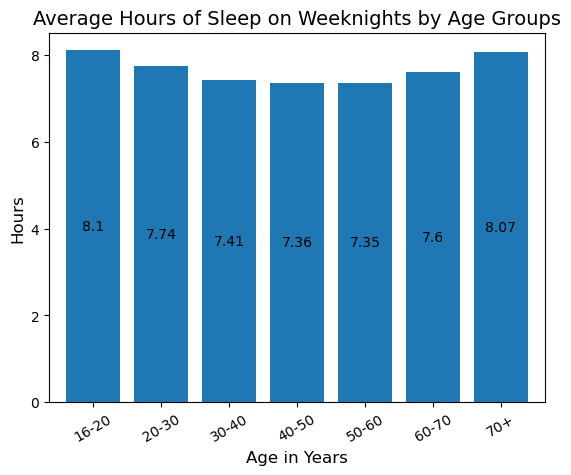

<Figure size 1000x2000 with 0 Axes>

In [19]:
# Plotting means
ax = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Week/Workdays"].plot(kind='bar', width = .8)
plt.title("Average Hours of Sleep on Weeknights by Age Groups", fontsize = '14')
ax.bar_label(ax.containers[0], label_type= 'center')
plt.xlabel("Age in Years", fontsize = '12')
plt.ylabel("Hours", fontsize = '12')
plt.yticks([0,2,4,6,8])
plt.xticks(rotation=30)
plt.figure(figsize=(10,20))

#Saving the visualization: 
plt.savefig("Visualizations/Age_Weeknights")
plt.show()


#### Sleep Weekends vs Age 

In [8]:
# Getting the sample size:
countsweekends = SleepAge[cols].groupby("Age Bins").count()["Sleep Hours Weekends"]
print(countsweekends)
# Getting the means:
meanweekends = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Weekends"]
meanweekends

Age Bins
16-20    1083
20-30    1385
30-40    1413
40-50    1437
50-60    1631
60-70    1644
70+      1506
Name: Sleep Hours Weekends, dtype: int64


C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\3309267369.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countsweekends = SleepAge[cols].groupby("Age Bins").count()["Sleep Hours Weekends"]
C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\3309267369.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meanweekends = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Weekends"]


Age Bins
16-20    9.31
20-30    8.62
30-40    8.38
40-50    8.23
50-60    8.08
60-70    8.04
70+      8.20
Name: Sleep Hours Weekends, dtype: float64

C:\Users\caleb\AppData\Local\Temp\ipykernel_4404\3569001566.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2 = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Weekends"].plot(kind='bar', width = .8)


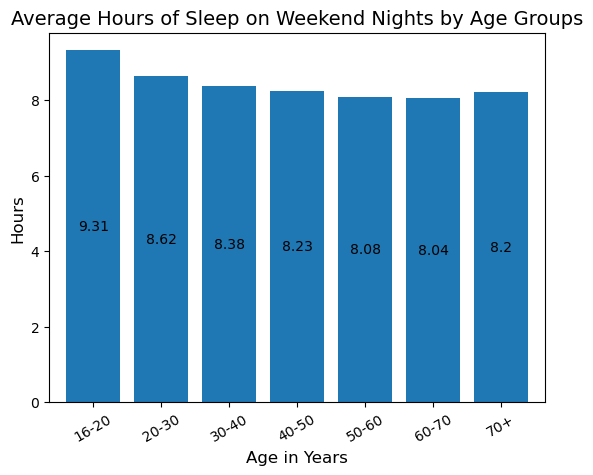

<Figure size 1000x2000 with 0 Axes>

In [9]:
# Plotting means
ax2 = round(SleepAge[cols].groupby("Age Bins").mean(),2)["Sleep Hours Weekends"].plot(kind='bar', width = .8)
plt.title("Average Hours of Sleep on Weekend Nights by Age Groups", fontsize = '14')
ax2.bar_label(ax2.containers[0], label_type= 'center')
plt.xlabel("Age in Years", fontsize = '12')
plt.ylabel("Hours", fontsize = '12')
plt.yticks([0,2,4,6,8])
plt.xticks(rotation=30)
plt.figure(figsize=(10,20))

#Saving the visualization: 
plt.savefig("Visualizations/Age_WeekendNights")
plt.show()

## Recreational activity versus tired during the day

In [10]:
# Only including those over 18, dropping NA values for the activity columns 
ActivityData = Final_Data.copy()
ActivityData = ActivityData.loc[ActivityData["Age at Screening"]>= 18.0]
ActivityData = ActivityData.dropna(subset=["Minutes of Moderate Recreation Daily","Minutes of Sedentary Activity Daily",
                                           "Minutes of Vigorous Recreation Daily"])


<BarContainer object of 1702 artists>

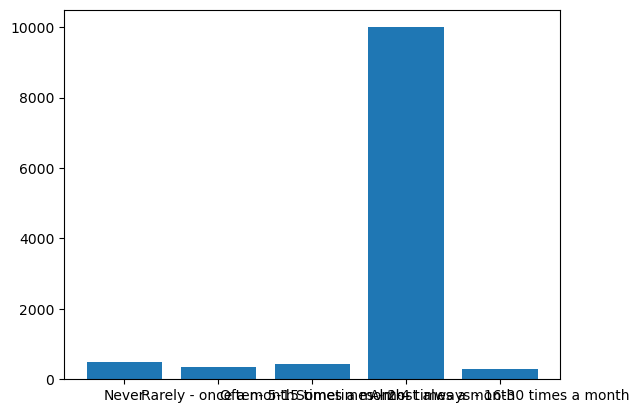

In [11]:
plt.bar(ActivityData["Feeling Tired During Day Frequency"], height=ActivityData["Minutes of Moderate Recreation Daily"])

In [12]:
ActivityData.info()
ActivityData = ActivityData.astype({"Minutes of Sedentary Activity Daily": int,
                                    "Minutes of Moderate Recreation Daily": int,
                                    "Minutes of Vigorous Recreation Daily": int
                                    })


<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 3 to 15559
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         1702 non-null   float64
 1   Number of Rx Meds                     732 non-null    float64
 2   Gender                                1702 non-null   float64
 3   Age at Screening                      1702 non-null   float64
 4   Race                                  1702 non-null   float64
 5   Educational Attainment                1563 non-null   float64
 6   Family Income to Poverty Ratio        1419 non-null   float64
 7   Minutes of Vigorous Work Daily        552 non-null    float64
 8   Minutes of Moderate Work Daily        864 non-null    float64
 9   Minutes of Vigorous Recreation Daily  1702 non-null   float64
 10  Minutes of Moderate Recreation Daily  1702 non-null   float64
 11  Minutes of Sedentary 